In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


In [50]:
import sklearn
loan_ds = pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')
loan_ds.drop(['loan_id'], inplace=True, axis=1)
loan_ds

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [51]:
print("Shape of the data frame: ", loan_ds.shape)
print("Total null values: ", loan_ds.isna().sum())
print("Duplicate values: ", loan_ds.duplicated().sum())

Shape of the data frame:  (4269, 12)
Total null values:   no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64
Duplicate values:  0


**Remove duplicate (We do not need it here as there is no duplicate values)**

In [52]:
# loan_ds.drop_duplicates(inplace=True)
# print("Shape of the data frame: ",loan_ds.shape)
# print("\n")
print("loan_status categories with its count \n", loan_ds[" loan_status"].value_counts())

loan_status categories with its count 
  loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64


In [53]:
loan_ds.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [54]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# loan_ds[" loan_status"] = label_encoder.fit_transform(loan_ds[" loan_status"])
# print("\n")
# print(loan_ds[" loan_status"].value_counts())



 loan_status
0    2656
1    1613
Name: count, dtype: int64


In [55]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
loan_ds[" education"] = label_encoder.fit_transform(loan_ds[" education"])
print("\n")
print(loan_ds[" education"].value_counts())



 education
0    2144
1    2125
Name: count, dtype: int64


In [56]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
loan_ds[" self_employed"] = label_encoder.fit_transform(loan_ds[" self_employed"])
print("\n")
print(loan_ds[" self_employed"].value_counts())



 self_employed
1    2150
0    2119
Name: count, dtype: int64


In [57]:
X = loan_ds.drop([" loan_status"], axis=1)
Y = loan_ds[" loan_status"]

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [60]:
y_pred = classifier.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[520,   6],
       [ 14, 314]])

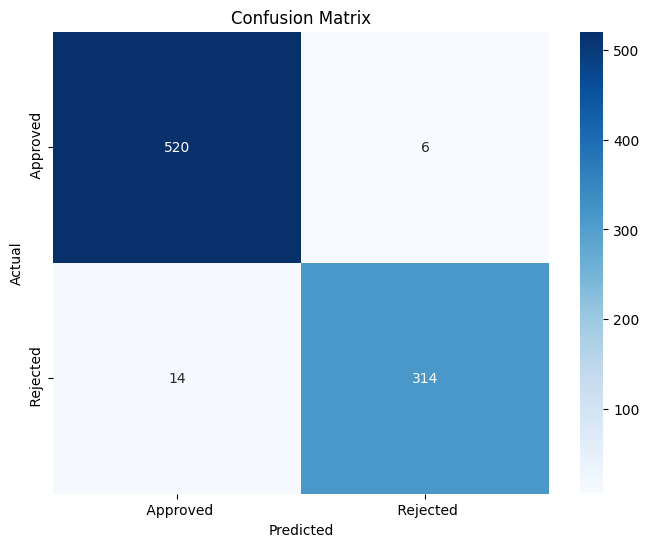

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)

# Set labels, title, and axis ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels([' Approved', ' Rejected'])
ax.yaxis.set_ticklabels([' Approved', ' Rejected'])

# Display the plot
plt.show()

In [63]:
y_pred = classifier.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print('The accuracy of the Random Forest is:', accuracy)

The accuracy of the Random Forest is: 0.9765807962529274


In [65]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       526
           1       0.98      0.96      0.97       328

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



In [66]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
print('accuracy:',accuracy_score(y_pred,Y_test))
print('precision:',precision_score(y_pred,Y_test,average='micro'))
print('recall:',recall_score(y_pred,Y_test,average='micro'))
print('f1_score:',f1_score(y_pred,Y_test,average='micro'))

accuracy: 0.9765807962529274
precision: 0.9765807962529274
recall: 0.9765807962529274
f1_score: 0.9765807962529274
